In [ ]:
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Credentials
from credentials import * 
def twitter_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

In [ ]:
extractor = twitter_setup()

tweets = extractor.user_timeline(screen_name="BorisJohnson", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

.@ShaunBaileyUK wants to make London safer, greener and more affordable. He would be a fantastic Mayor of London an… https://t.co/wpA4rsxJlM

RT @ShaunBaileyUK: I was homeless and unemployed. But I turned my life around.

And I spent 20 years as a youth worker helping others do th…

I've just spoken to @Douglas4Moray and congratulated him on becoming leader of the @ScotTories. I look forward to w… https://t.co/OjlbD5apKW

Tonight a candle has been lit in memory of John Hume and placed in the door of Downing Street. A symbol to all of u… https://t.co/BZpkxHa03V

The pictures and videos from Beirut tonight are shocking. All of my thoughts and prayers are with those caught up i… https://t.co/ETopi3ngEd



In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(df.head(10))

,Tweets
0,".@ShaunBaileyUK wants to make London safer, gr..."
1,RT @ShaunBaileyUK: I was homeless and unemploy...
2,I've just spoken to @Douglas4Moray and congrat...
3,Tonight a candle has been lit in memory of Joh...
4,The pictures and videos from Beirut tonight ar...
5,Fantastic to see that tens of thousands of new...
6,My sincerest condolences go to his devoted wif...
7,"His vision paved the way for the stability, po..."
8,With his passing we have lost a great man who ...
9,He led the SDLP with great distinction for mor...


In [ ]:
print(tweets[0].user)

In [ ]:
df['len']  = np.array([len(tweet.text) for tweet in tweets])
df['Language']   = np.array([tweet.lang for tweet in tweets])
df['Date'] = np.array([tweet.created_at for tweet in tweets])
df['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
df['ReTweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets
195,If you are contacted by an NHS contact tracer ...,140,en,2020-06-06 16:06:49,2993,527
196,Today I am thinking of the men who landed on t...,140,en,2020-06-06 11:57:25,32227,5821
197,Thank you for all you have been doing to fight...,140,en,2020-06-05 18:01:27,5276,618
198,If you are contacted by an NHS contract tracer...,140,en,2020-06-05 13:21:56,946,143
199,If you have coronavirus symptoms (a high tempe...,140,en,2020-06-05 13:21:56,1490,281


In [ ]:
from textblob import TextBlob
import re

def find_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
df['Sentiment'] = np.array([ find_sentiment(tweet) for tweet in df['Tweets'] ])

In [ ]:
df.tail()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment
195,If you are contacted by an NHS contact tracer ...,140,en,2020-06-06 16:06:49,2993,527,0
196,Today I am thinking of the men who landed on t...,140,en,2020-06-06 11:57:25,32227,5821,0
197,Thank you for all you have been doing to fight...,140,en,2020-06-05 18:01:27,5276,618,0
198,If you are contacted by an NHS contract tracer...,140,en,2020-06-05 13:21:56,946,143,0
199,If you have coronavirus symptoms (a high tempe...,140,en,2020-06-05 13:21:56,1490,281,1


In [ ]:
avg = np.mean(df['len'])
allowance = avg/280*100
allowance = ("%.2f" % allowance)
print(f"The average length of the tweets is {avg} which is {allowance}% the maximum length allowed.")

The average length of the tweets is 136.16 which is 48.63% the maximum length allowed.


In [ ]:
most_liked = df[df.Likes == np.max(df['Likes'])].Tweets
most_retweeted = df[df.ReTweets == np.max(df['ReTweets'])].Tweets

In [ ]:
print(f"The most liked Tweet is:\n {most_liked}")

The most liked Tweet is:
 189    People have a right to protest peacefully &amp...
Name: Tweets, dtype: object


In [ ]:
print(f"The most retweeted Tweet is:\n {most_retweeted}")

The most retweeted Tweet is:
 189    People have a right to protest peacefully &amp...
Name: Tweets, dtype: object


In [ ]:
time_liked = pd.Series(df['Likes'].values, index=df['Date'])
time_retweet = pd.Series(df['ReTweets'].values, index=df['Date'])

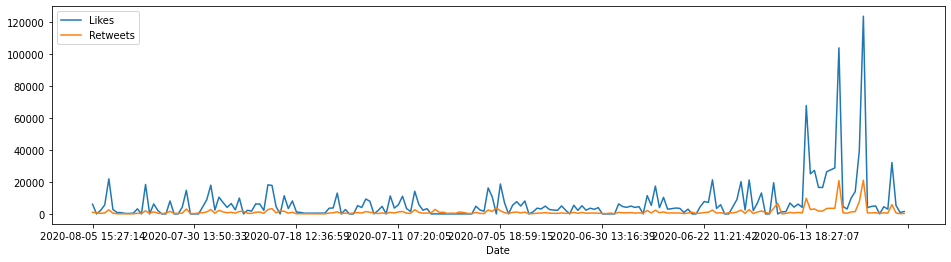

In [ ]:
time_liked.plot(figsize=(16,4), label="Likes", legend=True)
time_retweet.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
Total_likes = df['Likes'].sum()
Total_retweets = df['ReTweets'].sum()

In [ ]:
df.sort_values('Likes', ascending=False).head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
189,People have a right to protest peacefully &amp...,143,en,2020-06-07 20:13:35,123898,21166,1,People have a right to protest peacefully ; wh...
183,The statue of Winston Churchill in Parliament ...,140,en,2020-06-12 10:25:38,104091,20887,0,The statue of Winston Churchill in Parliament ...
175,Racist thuggery has no place on our streets. A...,140,en,2020-06-13 18:27:07,67953,9788,1,Racist thuggery has no place on our streets. A...
188,Let us work peacefully and lawfully to defeat ...,140,en,2020-06-08 19:31:09,39568,7680,1,Let us work peacefully and lawfully to defeat ...
196,Today I am thinking of the men who landed on t...,140,en,2020-06-06 11:57:25,32227,5821,0,Today I am thinking of the men who landed on t...


The total number of likes are  1384465
The total number of retweets are  245799




<BarContainer object of 1 artists>

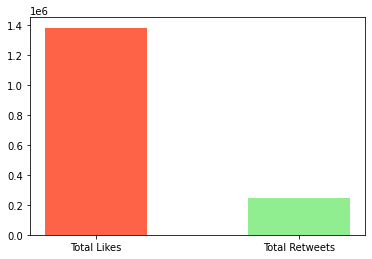

In [ ]:
ax = plt.subplot()
print('The total number of likes are ', Total_likes)
print('The total number of retweets are ', Total_retweets)
print('\n')
ax.bar('Total Likes', Total_likes, width=0.5, color='tomato', align='center')
ax.bar('Total Retweets', Total_retweets, width=0.5, color='lightgreen', align='center')

In [ ]:
#Sentiment Analysis
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets)/200*100
neu_tweets_perc = len(neu_tweets)/200*100
neg_tweets_perc = len(neg_tweets)/200*100

<BarContainer object of 1 artists>

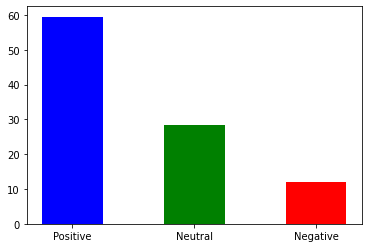

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df['Tweets Cleaned'] = df.Tweets.str.replace(r'http\S+', '').str.replace(r'@\S+', '').str.replace('&amp', '').str.rstrip()
Eng_Tweets = df[df['Language'] == 'en']
Eng_Tweets

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
0,".@ShaunBaileyUK wants to make London safer, gr...",140,en,2020-08-05 15:27:14,6057,1018,1,". wants to make London safer, greener and more..."
1,RT @ShaunBaileyUK: I was homeless and unemploy...,140,en,2020-08-05 15:20:18,0,694,-1,RT I was homeless and unemployed. But I turne...
2,I've just spoken to @Douglas4Moray and congrat...,140,en,2020-08-05 13:59:59,2261,368,1,I've just spoken to and congratulated him on ...
3,Tonight a candle has been lit in memory of Joh...,140,en,2020-08-04 20:56:40,5692,638,0,Tonight a candle has been lit in memory of Joh...
4,The pictures and videos from Beirut tonight ar...,140,en,2020-08-04 18:58:33,21969,2557,-1,The pictures and videos from Beirut tonight ar...
...,...,...,...,...,...,...,...,...
195,If you are contacted by an NHS contact tracer ...,140,en,2020-06-06 16:06:49,2993,527,0,If you are contacted by an NHS contact tracer ...
196,Today I am thinking of the men who landed on t...,140,en,2020-06-06 11:57:25,32227,5821,0,Today I am thinking of the men who landed on t...
197,Thank you for all you have been doing to fight...,140,en,2020-06-05 18:01:27,5276,618,0,Thank you for all you have been doing to fight...
198,If you are contacted by an NHS contract tracer...,140,en,2020-06-05 13:21:56,946,143,0,If you are contacted by an NHS contract tracer...


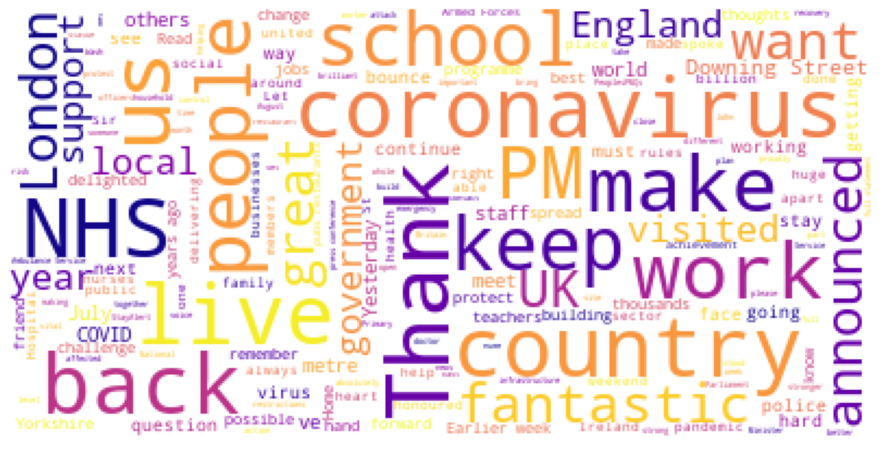

In [79]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.update(["say","said", "re", "now", "RT", "talk", "many", "today", "new", "watch"])
wordcloud_hc = WordCloud(max_font_size=40, relative_scaling=.5,stopwords=stopwords, colormap="plasma", background_color="White", max_words=500).generate(df['Tweets Cleaned'].str.cat())
plt.figure(figsize=[16,8])
plt.imshow(wordcloud_hc)
plt.axis("off")
plt.show()

# **COVID**

In [ ]:
Eng_Tweets = df[df['Language'] == 'en']
len(Eng_Tweets)

199

In [ ]:
covid = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID')]
covid_19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID-19')]
covid19 = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('COVID19')]
pandemic = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('pandemic')]
coronavirus = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('coronavirus')]
lockdown = Eng_Tweets[Eng_Tweets['Tweets'].str.contains('lockdown')]
covid_df = pd.concat([covid, covid_19, covid19, pandemic,coronavirus, lockdown])

In [ ]:
print('Total number of entries related to covid are', len(covid_df))

Total number of entries related to covid are 27


In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 5


In [ ]:
covid_df.drop_duplicates(subset ="Tweets", inplace = True) 

In [ ]:
duplicate = covid_df[covid_df.duplicated(['Tweets'])]
print('Number of duplicates are', len(duplicate))

Number of duplicates are 0


In [ ]:
print('Total number of entries for the given words, after removing duplicates, are', len(covid_df))

Total number of entries for the given words, after removing duplicates, are 22


In [ ]:
covid_df.head()

,Tweets,len,Language,Date,Likes,ReTweets,Sentiment,Tweets Cleaned
21,RT @10DowningStreet: Following an increase in ...,139,en,2020-07-31 09:34:56,0,350,1,"RT Following an increase in COVID-19 cases, t..."
71,"As we return to the many pubs, restaurants and...",140,en,2020-07-11 13:34:23,4731,607,1,"As we return to the many pubs, restaurants and..."
108,Places of worship have been working hard to ma...,140,en,2020-07-04 09:21:59,1269,165,1,Places of worship have been working hard to ma...
147,RT @10DowningStreet: Today PM @BorisJohnson ha...,140,en,2020-06-23 13:52:10,0,1048,1,"RT Today PM has announced that pubs, restaur..."
156,RT @10DowningStreet: The COVID alert level in ...,140,en,2020-06-19 11:32:29,0,745,0,RT The COVID alert level in the UK has moved ...


In [ ]:
covid_df.reset_index(drop=True, inplace=True)

In [ ]:
#Sentiment Analysis
pos_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] > 0]
neu_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] == 0]
neg_tweets_covid = [ tweet for index, tweet in enumerate(covid_df['Tweets']) if covid_df['Sentiment'][index] < 0]

#Percentages
pos_tweets_perc = len(pos_tweets_covid)/22*100
neu_tweets_perc = len(neu_tweets_covid)/22*100
neg_tweets_perc = len(neg_tweets_covid)/22*100

<BarContainer object of 1 artists>

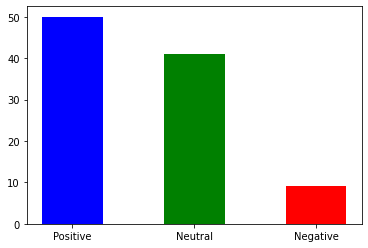

In [ ]:
ax1 = plt.subplot()
ax1.bar('Positive', pos_tweets_perc, width=0.5, color='b', align='center')
ax1.bar('Neutral', neu_tweets_perc, width=0.5, color='g', align='center')
ax1.bar('Negative', neg_tweets_perc, width=0.5, color='r', align='center')